In [46]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [47]:
#combining no of csv file into one file with name combine_csv
#os.chdir('D:\Final')
os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\with_Offset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df


,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3,True_range1,True_range2,True_range3
0,11.770082,0.145,-59.0,6.115656,0.150,-57,7.698439,0.372,-63,1,1,7,9,7,0,0,9,10.000000,6.082763,8.062258
1,11.283082,0.407,-55.0,6.145656,0.267,-56,7.659439,0.425,-63,1,1,7,9,7,0,0,9,10.000000,6.082763,8.062258
2,11.067082,0.245,-61.0,6.428656,0.630,-55,7.894439,0.414,-63,1,1,7,9,7,0,0,9,10.000000,6.082763,8.062258
3,10.130082,0.864,-69.0,5.803656,0.210,-56,8.401439,1.739,-62,1,1,7,9,7,0,0,9,10.000000,6.082763,8.062258
4,11.946082,0.252,-64.0,6.194656,0.105,-57,7.620439,0.513,-65,1,1,7,9,7,0,0,9,10.000000,6.082763,8.062258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1.468914,0.181,-53.0,7.828640,0.321,-69,6.049282,1.047,-64,6,8,7,9,7,0,0,9,1.414214,8.062258,6.082763
660,1.526914,0.136,-53.0,7.984640,0.226,-69,6.020282,1.098,-64,6,8,7,9,7,0,0,9,1.414214,8.062258,6.082763
661,1.429914,0.150,-53.0,8.062640,0.234,-68,6.078282,1.021,-64,6,8,7,9,7,0,0,9,1.414214,8.062258,6.082763
662,1.380914,0.206,-53.0,8.101640,0.158,-69,6.137282,1.027,-64,6,8,7,9,7,0,0,9,1.414214,8.062258,6.082763


In [48]:
df.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)

In [49]:
dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])


In [50]:


# Group the DataFrame by 'x' and 'y'
groups = dff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])


In [51]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [52]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [53]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [54]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()


In [55]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [56]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [57]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [58]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]

In [59]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [60]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 156)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))


Best Hyperparameters: {'max_depth': 8, 'n_estimators': 100}
Mean Squared Error in meter: 1.206
Root Mean Squared Error (RMSE) on new data in meter: 1.098
R2 score is in percent: 69.57


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.00
Root Mean Squared Error (RMSE) on new data in m: 1.00
R2 score is in percent: 74.01


In [68]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(156,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [69]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='test',
    project_name='hello')

INFO:tensorflow:Reloading Tuner from test\hello\tuner0.json


In [70]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Trial 20 Complete [00h 00m 47s]
val_loss: 2.791814645131429

Best val_loss So Far: 0.5006896158059438
Total elapsed time: 00h 08m 06s
INFO:tensorflow:Oracle triggered exit


In [71]:
tuner.results_summary()

Results summary
Results in test\hello
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 256
dropout_1: 0.2
num_hidden_layers: 2
units_2: 368
activation_2: relu
dropout_2: 0.4
learning_rate: 0.01
units_3: 400
activation_3: sigmoid
dropout_3: 0.30000000000000004
units_4: 288
activation_4: tanh
dropout_4: 0.4
units_5: 416
activation_5: relu
dropout_5: 0.0
units_6: 336
activation_6: relu
dropout_6: 0.0
units_7: 496
activation_7: tanh
dropout_7: 0.1
units_8: 176
activation_8: tanh
dropout_8: 0.1
units_9: 400
activation_9: relu
dropout_9: 0.2
units_10: 384
activation_10: relu
dropout_10: 0.2
units_11: 320
activation_11: relu
dropout_11: 0.30000000000000004
Score: 0.5006896158059438
Trial summary
Hyperparameters:
units_1: 320
dropout_1: 0.4
num_hidden_layers: 1
units_2: 64
activation_2: tanh
dropout_2: 0.1
learning_rate: 0.0001
units_3: 512
activation_3: tanh
dropout_3: 0.30000000000000004
units_4: 352
activation_4: tanh
dropout_4: 0.4
units_5: 128
activation_5: sigmoid
dropout_5

In [72]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 0s 474ms/step - loss: 27.2642 - mse: 27.2642 - val_loss: 8.2199 - val_mse: 8.2199
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 10.2044 - mse: 10.2044 - val_loss: 2.7207 - val_mse: 2.7207
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 3.9740 - mse: 3.9740 - val_loss: 0.8639 - val_mse: 0.8639
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 0.9045 - mse: 0.9045 - val_loss: 2.0167 - val_mse: 2.0167
Epoch 5/500
1/1 [==============================] - 0s 24ms/step - loss: 1.6032 - mse: 1.6032 - val_loss: 1.6527 - val_mse: 1.6527
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 1.6925 - mse: 1.6925 - val_loss: 0.8292 - val_mse: 0.8292
Epoch 7/500
1/1 [==============================] - 0s 20ms/step - loss: 1.2753 - mse: 1.2753 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 8/500
1/1 [==============================] - 0s 21ms/step - loss: 0.9620 - mse:

In [73]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.8197 - mse: 0.8197


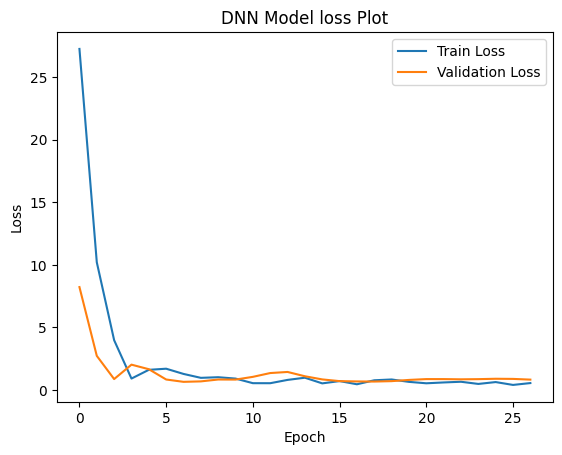

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [75]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 95ms/step


array([[4.6527066 , 1.7761112 ],
       [6.17273   , 5.9597588 ],
       [1.2204783 , 7.3383856 ],
       [2.8241246 , 2.1846368 ],
       [5.5694814 , 6.6082397 ],
       [4.212751  , 2.3374565 ],
       [1.2229092 , 0.87984633],
       [5.906118  , 5.8954186 ],
       [4.648202  , 0.8332553 ],
       [2.409887  , 6.7833886 ],
       [2.6171052 , 7.5043225 ],
       [1.349771  , 7.3562803 ]], dtype=float32)

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.82
Root Mean Squared Error (RMSE) on new data in m: 0.91
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 21.67
R2 score is in percent: 78.83


In [77]:
y_test=pd.DataFrame(y_test,columns=['x','y'])
y_pred=pd.DataFrame(y_pred, columns=['predicted_x','predicted_y'])

In [78]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred, y_test], axis=1)
df_final

,predicted_x,predicted_y,x,y
0,4.652707,1.776111,6,3
1,6.172730,5.959759,6,6
2,1.220478,7.338386,1,8
3,2.824125,2.184637,3,4
4,5.569481,6.608240,5,8
5,4.212751,2.337456,5,4
6,1.222909,0.879846,2,2
7,5.906118,5.895419,5,5
8,4.648202,0.833255,5,2
9,2.409887,6.783389,3,6


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}
Mean Squared Error in meter: 0.158
Root Mean Squared Error (RMSE) on new data in meter: 0.398
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 9.388
R2 score is in percent: 95.66


In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.74
Root Mean Squared Error (RMSE) on new data in m: 0.86
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 21.72
R2 score is in percent: 79.29


In [81]:
from tensorflow.keras.models import load_model

dnn_model.save('m3y_DNN_Regrr_model_xy.h5')


In [83]:
loaded_model = load_model('m3y_DNN_Regrr_model_xy.h5')
loaded_model

In [88]:
data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\With_offset'

In [90]:
os.chdir(data_folder)
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
dfff

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y,x1,y1,x2,y2,x3,y3,True_range1,True_range2,True_range3
0,9.668149,1.209,-67.0,6.055633,0.163,-55,8.026878,0.140,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
1,9.727149,1.174,-66.0,6.055633,0.162,-55,8.055878,0.150,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
2,9.580149,1.205,-66.0,6.055633,0.140,-55,8.114878,0.125,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
3,9.697149,1.191,-67.0,6.016633,0.126,-55,7.977878,0.165,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
4,9.815149,1.128,-66.0,6.055633,0.186,-55,8.084878,0.145,-65,1,1,7.0,9.0,7.0,0.0,0.0,9.0,10.000000,6.082763,8.062258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1.482527,0.661,-53.0,8.242545,0.126,-68,6.282632,0.907,-60,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763
219,1.511527,0.165,-54.0,8.242545,0.141,-68,6.517632,0.874,-59,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763
220,1.580527,0.136,-54.0,8.281545,0.126,-68,6.722632,0.577,-56,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763
221,1.306527,1.239,-52.0,8.359545,0.065,-68,6.077632,1.011,-58,6,8,7.0,9.0,7.0,0.0,0.0,9.0,1.414214,8.062258,6.082763


In [91]:
dfff.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)

In [92]:
dffff=dfff.assign(Product_RTT=dfff['AP1RTT']*dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT12=dfff['AP1RTT']*dfff['AP2RTT'],Product_RTT23=dfff['AP2RTT']*dfff['AP3RTT'],Product_RTT13=dfff['AP1RTT']*dfff['AP3RTT'],square_RTT1=dfff['AP1RTT']*dfff['AP1RTT'],square_RTT2=dfff['AP2RTT']*dfff['AP2RTT'],square_RTT3=dfff['AP3RTT']*dfff['AP3RTT'])


In [93]:
import pandas as pd

# Group the DataFrame by 'x' and 'y'
groups = dffff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])


In [94]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [95]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [96]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [97]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()

In [98]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [99]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [100]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [101]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]

In [102]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [103]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(37, 2)
(37, 156)


In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

#X_val=sc.fit_transform(X_val)

In [105]:
y_predd=loaded_model.predict(XX)
y_predd

2/2 [==============================] - 0s 2ms/step


array([[0.8160543 , 0.5950501 ],
       [1.3270434 , 1.3876768 ],
       [1.668397  , 2.1804554 ],
       [1.2803026 , 7.4328423 ],
       [1.3299277 , 7.5154624 ],
       [1.4334776 , 0.92389905],
       [1.8920596 , 1.6866547 ],
       [2.486594  , 2.0628092 ],
       [1.6173804 , 7.5238166 ],
       [1.755348  , 7.513654  ],
       [3.1814735 , 0.5691227 ],
       [2.545665  , 1.6222832 ],
       [3.1545002 , 2.5496383 ],
       [3.305558  , 3.880385  ],
       [3.0791366 , 4.9346786 ],
       [2.8556242 , 7.319489  ],
       [2.7442615 , 7.50483   ],
       [2.7173083 , 7.571714  ],
       [4.0569534 , 0.9239137 ],
       [3.8610103 , 1.7972937 ],
       [3.912689  , 2.5987601 ],
       [4.0931106 , 3.9733508 ],
       [4.428775  , 7.428304  ],
       [4.6768885 , 1.138876  ],
       [4.7011204 , 1.3162609 ],
       [5.064333  , 3.9307945 ],
       [5.8459654 , 6.1773686 ],
       [5.4611225 , 6.602866  ],
       [5.2994633 , 6.8050456 ],
       [5.3053093 , 6.827007  ],
       [4.

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

#print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.27
Root Mean Squared Error (RMSE) on new data in mm: 0.52
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 13.45


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import r2_score

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_predd,yy)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 100}
Mean Squared Error in meter: 0.065
Root Mean Squared Error (RMSE) on new data in meter: 0.255
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 8.68
R2 score is in percent: 98.43


In [108]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])

In [109]:
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.29,1.190000,1,1
1,1.34,1.890000,1,2
2,1.39,2.910000,1,3
3,1.46,7.300000,1,7
4,1.26,7.780000,1,8
5,1.80,1.275000,2,1
6,1.87,2.095000,2,2
7,2.12,2.830000,2,3
8,1.81,7.350000,2,7
9,1.84,7.810000,2,8


Text(0.5, 1.0, 'Predicted data scatter with test data ')

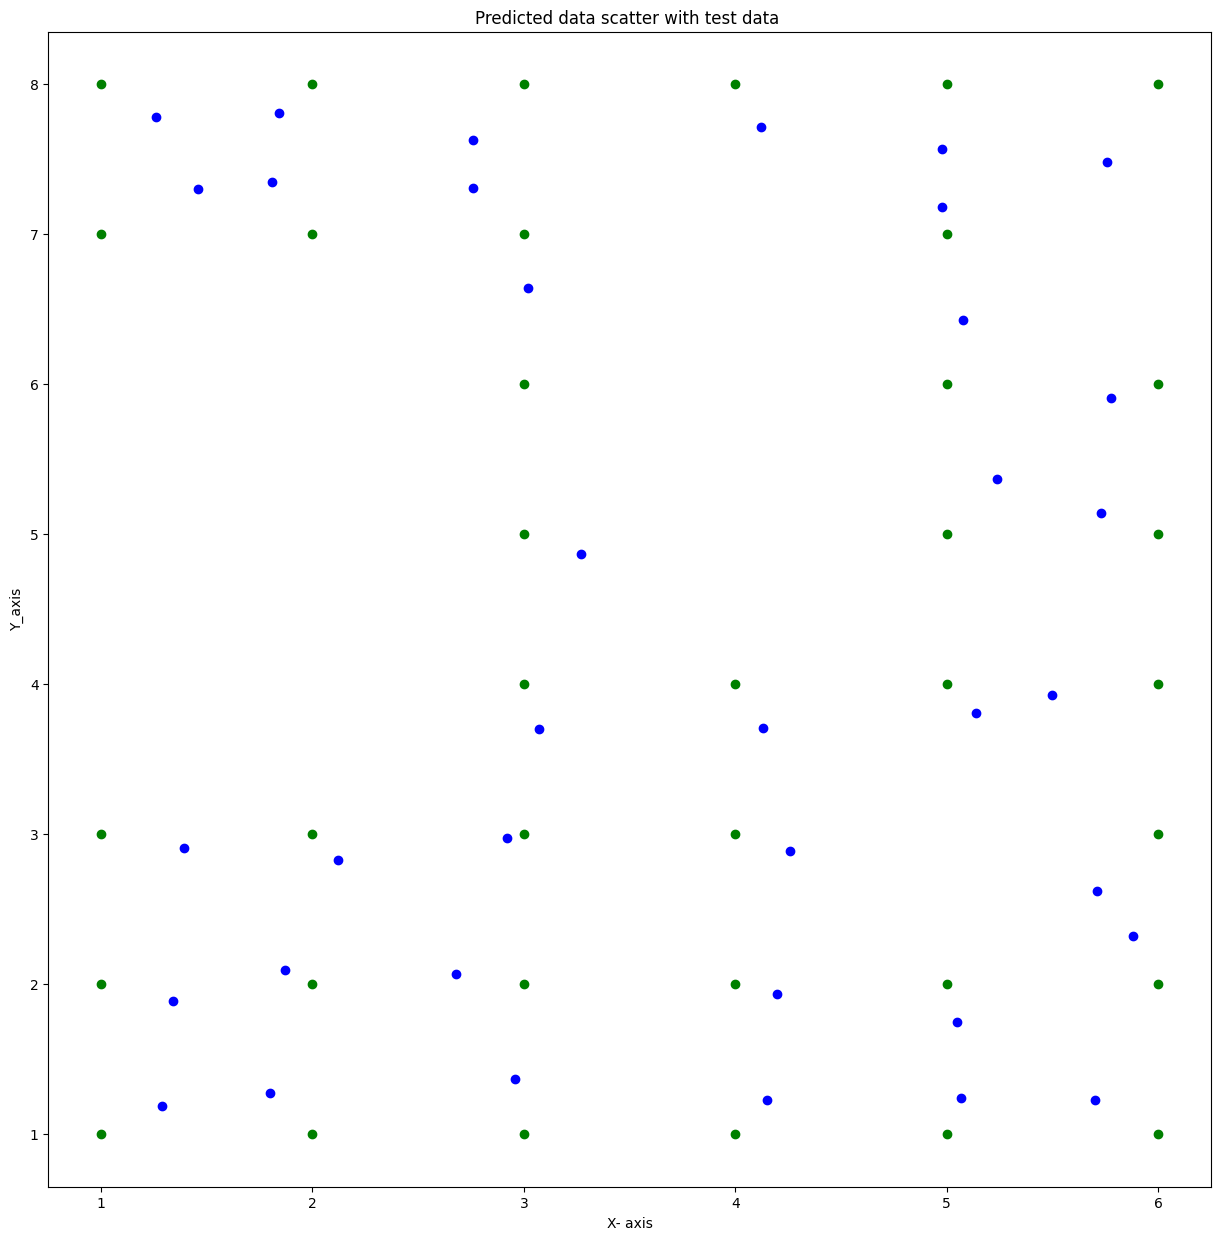

In [110]:
plt.figure(figsize=(15,15))
plt.scatter(df_finall['predicted_x'], df_finall['predicted_y'], color='blue')
plt.scatter(df_finall['x'], df_finall['y'], color='green')
plt.xlabel('X- axis')
plt.ylabel('Y_axis')
plt.title('Predicted data scatter with test data ')

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_predd, yy)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 0.15
Root Mean Squared Error (RMSE) on new data in m: 0.39
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 13.38
R2 score is in percent: 96.04


In [112]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state = 42)

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XX_train, yy_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(XX_test)

# Calculate the mean squared error
mse = mean_squared_error(yy_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,RF_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 0.302
Root Mean Squared Error (RMSE) on new data in meter: 0.549
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 13.01
R2 score is in percent: 89.25


In [114]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(XX_train,yy_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(XX_test)

# Calculate the evaluation metrics
mse = mean_squared_error(yy_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy_test,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy_test, knn_pred)*100))

Best K value found by grid search: 5
Mean Squared Error (MSE) on new data in m: 0.57
Root Mean Squared Error (RMSE) on new data in m: 1.63
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 21.28
R2 score is in percent: 80.10


In [115]:
#df_finall.to_csv('output_data.csv', index=False)